#  All you also learn at youtube playlist  
## Basic  --

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.wikipedia.org/'
req = requests.get(url)

In [3]:
req.text

'<!DOCTYPE html>\n<html lang="mul" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:url(portal/wikipedia.org/assets/img/sprite-46c49284.png);background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-46c49284.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister

###  requests  --  with using requests we can open any website and also get data ( unstructured contains all the tags adn classes of html ) but it is not useful, so we use  ---
###  BeautifulSoup  --  with the help of this we can get any data within website from any tag, any class etc . . .

In [4]:
# # # --  it reads html data     ----
soup = BeautifulSoup(req.text, 'lxml')  #   ---  here we use 'lxml'  for processing 'html'


#  it reads any data from those html site which we already read above  ---
title = soup.select('title')    #  --  here we read 'titel'  
print(title)


[<title>Wikipedia</title>]


##  Little Advance  --

In [5]:
url = 'https://en.wikipedia.org/wiki/Machine_learning'

res = requests.get(url)

soup = BeautifulSoup(res.text, 'lxml')


In [6]:
# it will get all the headlines   ---

for i in soup.select('.mw-headline'):
    print(i.text)
    

Overview
Machine learning approaches
History and relationships to other fields
Artificial intelligence
Data mining
Optimization
Statistics
 Theory
Approaches
Types of learning algorithms
Supervised learning
Unsupervised learning
Semi-supervised learning
Reinforcement learning
Self learning
Feature learning
Sparse dictionary learning
Anomaly detection
Robot learning
Association rules
Models
Artificial neural networks
Decision trees
Support vector machines
Regression analysis
Bayesian networks
Genetic algorithms
Training models
Federated learning
Applications
Limitations
Bias
Model assessments
Ethics
Hardware
Software
Free and open-source software
Proprietary software with free and open-source editions
Proprietary software
Journals
Conferences
See also
References
Further reading
External links


In [7]:
for i in soup.select('.toctext'):
    print(i.text)

Overview
Machine learning approaches
History and relationships to other fields
Artificial intelligence
Data mining
Optimization
Statistics
Theory
Approaches
Types of learning algorithms
Supervised learning
Unsupervised learning
Semi-supervised learning
Reinforcement learning
Self learning
Feature learning
Sparse dictionary learning
Anomaly detection
Robot learning
Association rules
Models
Artificial neural networks
Decision trees
Support vector machines
Regression analysis
Bayesian networks
Genetic algorithms
Training models
Federated learning
Applications
Limitations
Bias
Model assessments
Ethics
Hardware
Software
Free and open-source software
Proprietary software with free and open-source editions
Proprietary software
Journals
Conferences
See also
References
Further reading
External links


###  Whole Scraping  --

#### in this example we web scrap graphics cards from Newegg.com  --

In [1]:
#  importing libraries  --

from bs4 import BeautifulSoup as soup
import requests


In [2]:

page_url = "https://www.newegg.com/Video-Card/EventSaleStore/ID-4438"

data = requests.get(page_url)

page_soup = soup(data.text, 'lxml')

In [10]:
print(page_soup.h1)
print(page_soup.body.span)

<h1 class="page-title-text">Video Card</h1>
<span class="hid-text">Search</span>


In [3]:

# finds each product from the store page
containers = page_soup.findAll("div", {'class' : 'item-container'})
len(containers)


0

In [4]:

# name the output file to write to local disk
out_filename = "graphics_cards.csv"


In [5]:

# header of csv file to be written
headers = "product_name,shipping \n"


In [6]:

#open file and write header  --
f = open(out_filename, 'w')
f.write(headers)


23

1) Brand Name  =  for brand name first it gose into 'div class - item-info' then 'div class 'item-branding' then 'class - a' then 'img' then call 'title' that handle brand name

2) Title Name = in which we have 'a class name = item-title' from this we can extract title name 

3) Shipping Price = in which we have 'li class name = price-ship' from this we can extract shipping price


In [7]:
# loops over each product and grabs attributes about
# each product

for contain in containers:
     
    # brand name  --
#     brand = contain.div.div.a.img["title"]
#     brand = contain.div.findAll('a', {'class' : 'item-branding'})
#     brand_name = brand[0].img['title'].title()
    
    # titel  --
    title = contain.findAll('a', {'class' : 'item-title'})
    title_name = title[0].text
    
    # shipping  --
    shipping = contain.findAll('li', {'class' : 'price-ship'})
    shipping_price = shipping[0].text.strip()
    
    
#     print("brand_name: " + brand + "\n")
    print("title_name: " + title_name + "\n")
    print("shipping_price: " + shipping_price + "\n")

    f.write(title_name.replace(",", "|") + ", " + shipping_price + "\n")
    
f.close()

In [16]:
# new  --

##  Another new html scraping - --

In [31]:

import pandas as pd
from bs4 import BeautifulSoup
import requests
import csv


In [32]:

url = "https://coreyms.com"
source = requests.get(url).text

soup = BeautifulSoup(source, 'lxml')


In [34]:

csv_file = open('corey_scrap.csv', 'w')
csv_writer = csv.writer(csv_file)
csv_writer.writerow(['headline', 'summary', 'video_link'])


29

In [35]:
#main  --

for article in soup.find_all('article'):
    
    #headline
    headline = article.h2.a.text
    print(headline)
    
    #summary 
    summary = article.find('div', class_ = 'entry-content').p.text
    print(summary)
    
    # ytb link  --
    try:
        video_src = article.find('iframe', class_ = 'youtube-player')['src']
        vid_id = video_src.split('/')[4]
        vid_id = video_src.split('?')[0]
        yt_link = f'https://youtube.com/watch?v={vid_id}'
        
    except Exception as e:
        yt_link = None
        
    print(yt_link)
    
    print()
    
    csv_writer.writerow([headline, summary, yt_link])

csv_file.close()

Python Tutorial: Zip Files – Creating and Extracting Zip Archives
In this video, we will be learning how to create and extract zip archives. We will start by using the zipfile module, and then we will see how to do this using the shutil module. We will learn how to do this with single files and directories, as well as learning how to use gzip as well. Let’s get started…
https://youtube.com/watch?v=https://www.youtube.com/embed/z0gguhEmWiY

Python Data Science Tutorial: Analyzing the 2019 Stack Overflow Developer Survey
In this Python Programming video, we will be learning how to download and analyze real-world data from the 2019 Stack Overflow Developer Survey. This is terrific practice for anyone getting into the data science field. We will learn different ways to analyze this data and also some best practices. Let’s get started…
https://youtube.com/watch?v=https://www.youtube.com/embed/_P7X8tMplsw

Python Multiprocessing Tutorial: Run Code in Parallel Using the Multiprocessing Module

In [21]:
# new  --

## Another scraping  --

In [1]:

import requests
from bs4 import BeautifulSoup


<!DOCTYPE html>
<html lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<title>UMG Gaming Loading</title>
<style>@font-face{font-display:swap;font-family:Titillium Web;font-style:normal;font-weight:400;src:local("Titillium Web Regular"),local("TitilliumWeb-Regular"),url(data:font/woff2;base64,d09GMgABAAAAABp0AA4AAAAASjQAABoeAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhYbmAwcWAZgAIEUEQgK3yDIRwuCIgABNgIkA4RABCAFhUQHiwkbwzxFRoWNAwAUd7AjqkUPjaJqsiT4v07emP3QQ1RigmAtCcwErU2QatTCSN0xtA56fy57NQtxyZR96EEockxcR8yz/y85QpNTtPL8P8fA+/4yaU1raq22TaMoQQYUTRVAE5/OJjjc2Ruetvnv4OSII8oEBLEKsYIMgzASjAQLo5bOlYtOfpX7ka77V+nm1veqvt6R0nJH2E4ff5O/UpqcUtsRoEhLdC1bSgW+NiLe8rLVUkjC7lPqMDooBzupdjY0Lkvp/4n0xJM2i20675kt2LTFA5xr0N19B2OMYAPEyV759zrL1u9CqDvuAgAtYMlYZa4KSs9fXn99A83GspfBG/ty9u5OYn/JXpl2rCBDxdABc7dtCIumil+/tr5yArW8rQ33JJ7EG0Pn2v4ayAEdolqBXz+MMkdh52GqBWVNRVZkghFWKR4Zr7a3psXYyuteYgSLqNOPWAGstIoeEMjy/d0BlguVBHPqjMECKPdvdrsABQzw3Oh3726nC+CBaD
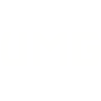

In [16]:

# get the data
data = requests.get('https://umggaming.com/leaderboards?__cf_chl_jschl_tk__=352ecbe82f05f973ea50ef0d8ed02ca7f4329481-1597140584-0-AWH76_5gjbHP5WH9s4iuEnEAUYeR1zTkhRGOPQEi0UpRzJ8_B1o32stUo5gyvPOydkMpdV-XcRV0diR-c57Y9niWOImdGyX1JsrEw3_WlmaHeiK7ETf8t-cPtDplxVWbRGRSmZXahqYm-OnASf_jnlTa9S5IaOud_A0srrWA9z510N4HobnEXDwnhDe1topH141KnxARWLl86-OXa9lXwCyqCn94PZ4-oI-KgHCkAvIMrMfH60uIJGpfBnYOZD2ARUpjqq8ynG4H8N-SSeos60q1U6j-v6Pvc0w7IX7x_MxJ')

soup = BeautifulSoup(data.content)

print(soup)

In [17]:
#--

leaderboard = soup.find('div', class_ = 'table-responsive')
# try:
#     lead = leaderboard.find('tbody')
# except:
#     None
print(leaderboard)
# for data in leaderboard.find_all('tr'):
    
#     rank = data.find_all('td')[0].text.strip()
    
#     name = data.find_all('td')[1].find_all('a')[0].text.strip()
    
#     score = data.find_all('td')[3].text.strip()
    
#     print(rank, name, score)

None


In [ ]:
# in the above example their is something issue so just ignore that except this our code is perfect 

## Scraping of Images  --

In [2]:
#
import requests
from bs4 import BeautifulSoup
import urllib.request


In [3]:
# name the output file to write to local disk

# out_filename = "image_Yoda.csv"
# f = open(out_filename, 'w')


# -- 
url = 'https://www.reddit.com/r/BabyYoda'

response = requests.get(url)

print(response.status_code)

# checking response.status_code (if you get 502, try rerunning the code)
if response.status_code != 200:
    print(f"Status: {response.status_code} — Try rerunning the code\n")
else:
    print(f"Status: {response.status_code}\n")

    
    
soup = BeautifulSoup(response.content, 'html.parser')
# print(soup.prettify())


images = soup.find_all('img',{'alt' : 'Post image'})

number = 0

for image in images:
    img_src = image['src']
    print(img_src)
    urllib.request.urlretrieve(img_src, str(number))
    number = number + 1
    
#     f.write(img_src)
    
# f.close()

502
Status: 502 — Try rerunning the code



In [ ]:
#  new  --

## Another but useful  --

In [20]:
# --
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = "https://forecast.weather.gov/MapClick.php?lat=34.05361000000005&lon=-118.24549999999999#.XzJlbIgzbIU"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')

week = soup.find(id = 'seven-day-forecast-body')

month = week.find_all(class_ = 'tombstone-container')

day = [item.find(class_ = 'period-name').get_text() for item in month]

nature = [item.find(class_ = 'short-desc').get_text() for item in month]

temp = [item.find(class_ = 'temp').get_text() for item in month]

# for forecast in month:
#     day = forecast.find(class_ = 'period-name').get_text()
#     nature = forecast.find(class_ = 'short-desc').get_text()
#     temp = forecast.find(class_ = 'temp').get_text()
    
# save into csv file  -- -- - - -  -    
    
weature =  pd.DataFrame(
        {'day' : day,
        'nature' : nature,
         'temp' : temp,
        }
        )
print(weature)

weature.to_csv('weature_for.csv')

              day         nature         temp
0       Overnight   Mostly Clear   Low: 60 °F
1         Tuesday          Sunny  High: 83 °F
2    TuesdayNight          Clear   Low: 61 °F
3       Wednesday          Sunny  High: 85 °F
4  WednesdayNight   Mostly Clear   Low: 64 °F
5        Thursday   Mostly Sunny  High: 87 °F
6   ThursdayNight  Partly Cloudy   Low: 70 °F
7          Friday          Sunny  High: 92 °F
8     FridayNight   Mostly Clear   Low: 73 °F


In [4]:
# new  ---

## White house breifings  Sracping  --

In [7]:
#
import pandas as pd
import requests
from bs4 import BeautifulSoup


url = "https://www.whitehouse.gov/briefings-statements/"
data = requests.get(url)
soup = BeautifulSoup(data.content, 'html.parser')


urls = []
for link in soup.find_all('h2'):
    
    links = link.find('a')
    
    urls.append(links.attrs['href'])
    
print(urls)


['https://www.whitehouse.gov/briefings-statements/remarks-president-trump-press-briefing-august-11-2020/', 'https://www.whitehouse.gov/briefings-statements/president-donald-j-trump-using-every-available-resource-deliver-safe-effective-vaccine-american-people/', 'https://www.whitehouse.gov/briefings-statements/second-lady-karen-pence-highlights-suicide-prevention-visits-military-spouse-owned-business-charlotte-nc/', 'https://www.whitehouse.gov/briefings-statements/remarks-president-trump-press-briefing-august-10-2020/', 'https://www.whitehouse.gov/briefings-statements/statement-national-security-advisor-robert-c-obrien/', 'https://www.whitehouse.gov/briefings-statements/readout-vice-presidents-governors-briefing-covid-19-response-best-practices-081020/', 'https://www.whitehouse.gov/briefings-statements/statement-press-secretary-081020/', 'https://www.whitehouse.gov/briefings-statements/president-donald-j-trump-unleashing-americas-5g-potential/', 'https://www.whitehouse.gov/briefings-sta

In [ ]:
# new  --

## E-bay scraping  ---

In [1]:
#

import requests
from bs4 import BeautifulSoup
import urllib.request


In [37]:

url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=xbox.one&_sacat=0&LH_TitleDesc=0&_pgn=1'
# page_num = "1"
# data = requests.get(url + page_num)

data = requests.get(url)

soup = BeautifulSoup(data.content , 'lxml')


#  for   single   data  it  works  properly    - -  - ------------ ----------
find = soup.find("li", {'class' : 's-item'})
link = soup.find('a', class_ = 's-item__link')['href']
title = soup.find('h3', class_ = 's-item__title')
price = soup.find('span', class_ = 's-item__price')
print(title.text)
print(link)
print(price.text)
#     #        #  ------- --------- -------- ----------- -------------

# num = 1
# for i in range(5):
# soups = soup.find_all("li", {'class' : 's-item'})

# for sou in soups:
    
#     link = sou.find('a', class_ = 's-item__link')
#     title = sou.find('h3', class_ = 's-item__title')
#     price = sou.find('span', class_ = 's-item__price')
#     print(title.text)
#     print(link.get('href'))
#     print(price.text)
        
    
#     num = num + 1
#     page_num = str(num)
#     url = 'https://www.ebay.com/sch/i.html?_from=R40&_nkw=xbox.one&_sacat=0&LH_TitleDesc=0&_pgn='
#     data = requests.get(url + page_num)
#     soup = BeautifulSoup(data.content , 'lxml')



# but for multiple products it didn't work properly   - - -  - - - 


Microsoft Xbox One S All-Digital Edition 1TB White Console
https://www.ebay.com/itm/Microsoft-Xbox-One-S-All-Digital-Edition-1TB-White-Console/313182575575?epid=8032589296&hash=item48eb22dbd7:g:j34AAOSwO~1fNcEU
INR 11,498.13


In [ ]:
#  new  --

## Amazon automated  - - - - - 

#### In the below code what we do -- if the price of product thta which we eanna buy is falls down by our prefered price then the code send us a email in our email id to chech that product  - -

In [4]:
#
import requests
from bs4 import BeautifulSoup
import smtplib

url = "https://www.amazon.in/U-S-Polo-Assn-Regular-I633-195-PL_Navy_Medium/dp/B0793HPJTG/ref=sr_1_63?dchild=1&keywords=mens+t-shirts&qid=1597311127&sr=8-63"
headers = {
    "User-Agent" : 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'
    }


In [9]:
# =

def check_price():  
    
    data = requests.get(url, headers = headers)
# print(data.status_code)

    soup = BeautifulSoup(data.content, 'lxml')
# print(soup.prettify())

    title = soup.find('span', id = 'productTitle')
# print(title.text.strip())

    price = soup.find(id = 'priceblock_ourprice').text
#     con_price = int(float(price[5:]))
    print(price)
    
    if price < '399.00':
        send_email()

        
        #  Process Of Sending An Email   ---------------------------------------------------------------------------- -----
# ( dou to some problem )
        
        
def send_email():
    
    server = smtplib.SMTP('smtp.gmail.com', 587)
    server.ehlo()
    server.starttls()
    server.ehlo()
    
    server.login('hemantsethiya91gmail.com', '123456@h')
    
    subject = 'Price Fell Down '
    body = 'Check the amazon link : https://www.amazon.in/U-S-Polo-Assn-Regular-I633-195-PL_Navy_Medium/dp/B0793HPJTG/ref=sr_1_63?dchild=1&keywords=mens+t-shirts&qid=1597311127&sr=8-63'
    
    msg = f"Subject: {subject}\n\n{body}"
    
    server.send_email(
        'hemantsethiya91@gmail.com',
        'hemantsethiya600@gmail.com',
        msg
    )
    
    print('Hey email has been send!')
    
    server.quit()
    
check_price()

AttributeError: 'NoneType' object has no attribute 'text'

In [ ]:
# new  - - - - -

##  Image Download - -
### one of the best code  - - -  -

In [8]:
#
import pandas as pd
import requests
from bs4 import BeautifulSoup
import urllib.request
import random


url = "https://www.creativeshrimp.com/top-30-artworks-of-beeple.html"
data = requests.get(url)
soup = BeautifulSoup(data.text, 'lxml')

for img in soup.find_all('a', class_ = 'lightbox'):
    
    link = img.get('href')
#     print(link)
    img_name = random.randrange(1,500)
    
    full_name = str(img_name) + '.jpg'
    
    urllib.request.urlretrieve(link, full_name)   # for download images
    
    print('Work - ')
    
# -- - -

# It download all the images into that directory where our anaconda is installed   - - - 

Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 
Work - 


In [38]:
#  new  - - - - - 
#  without any help  from   youtube   -  - - - 

In [4]:

import requests
from bs4 import BeautifulSoup

url = 'https://www.udemy.com/courses/search/?q=python'

response = requests.get(url)
# print(response.ok)
soup = BeautifulSoup(response.text, 'lxml')

# data = soup.find('div', class_ = 'filter-container--container--3A8k6')

# course = data.find('div', class_ = 'popover--popover--t3rNO popover--popover-hover--14ngr')
link = soup.find_all('a', id_ = 'u509-popover-trigger--611')
print(link.get('href'))
# for course in data.find_all('div', class_ = 'popover--popover--t3rNO popover--popover-hover--14ngr'):
    
#     link = course.find('a', id_ = 'u509-popover-trigger--611')['href']

TypeError: list indices must be integers or slices, not str

# Automation ( selenium )  --


In [1]:
from selenium import webdriver

In [4]:
import requests
from bs4 import BeautifulSoup as soup

In [5]:
driver = webdriver.Chrome()

driver.get('https://www.youtube.com/')

searchbox = driver.find_element_by_xpath('//*[@id="search-container"]')
searchbox.send_keys('Krish Naik')

search = driver.find_element_by_xpath('//*[@id="search-icon-legacy"]')
search.click()


AttributeError: 'str' object has no attribute 'find_all'